In [10]:
pip install matplotlib seaborn

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
# Load the TF-IDF data for questions
data = pd.read_csv('/content/drive/MyDrive/VIP Assessment Quality/Data Science/Data/testing_business_history.csv')

# Drop extraneous columns to isolate the feature matrix
X = data.drop(columns=['Problem', 'DOK Level'])
Y = data['DOK Level']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the different model options
models = {
    "Random Forest": RandomForestRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Support Vector": SVR(),
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0)
}

best_score = float('inf')
best_model_name = ""

# Cross-validate and determine the best model
for name, model in models.items():
    cv_score = -cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()
    if cv_score < best_score:
        best_score = cv_score
        best_model_name = name

# Train the best model on the entire training data
best_model = models[best_model_name]
best_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = best_model.predict(X_test)

# Compute RMSE and MAE
rmse = mean_squared_error(y_test, predictions, squared=False)
mae = mean_absolute_error(y_test, predictions)

print(f"Best Model: {best_model_name}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")

Best Model: Ridge Regression
Root Mean Squared Error: 0.6868861597975471
Mean Absolute Error: 0.43437477064806645


In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-14-89ec45650e4c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y, kde=False, bins=30)


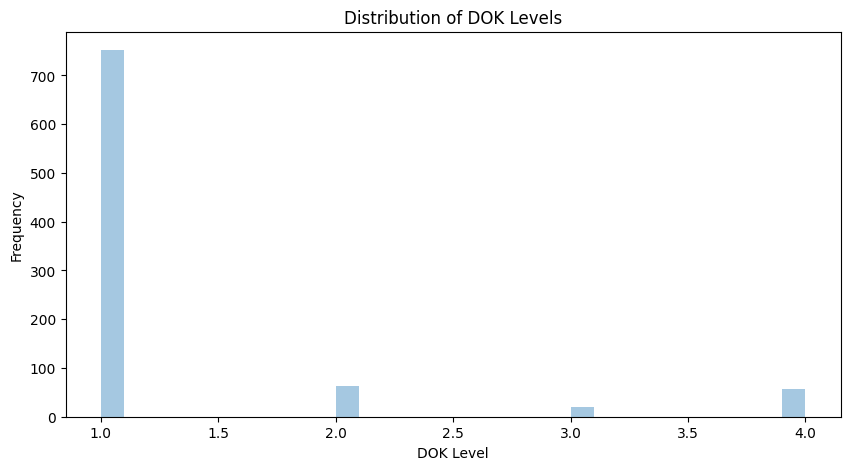

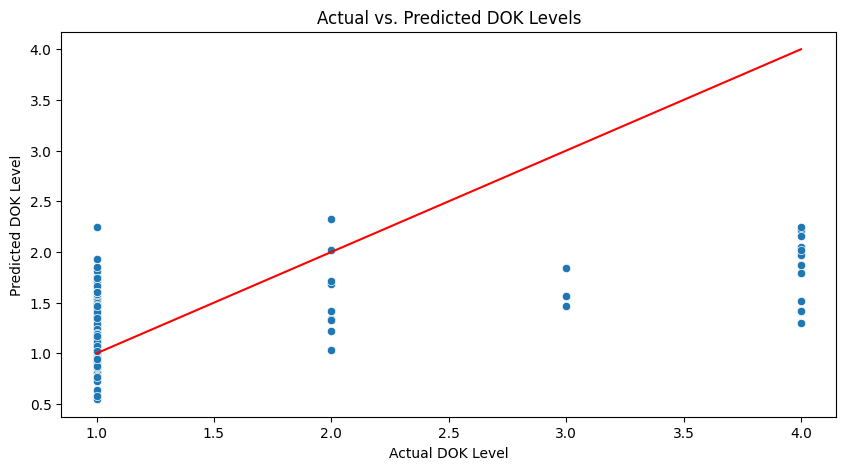

<ipython-input-14-89ec45650e4c>:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - predictions), bins=30)


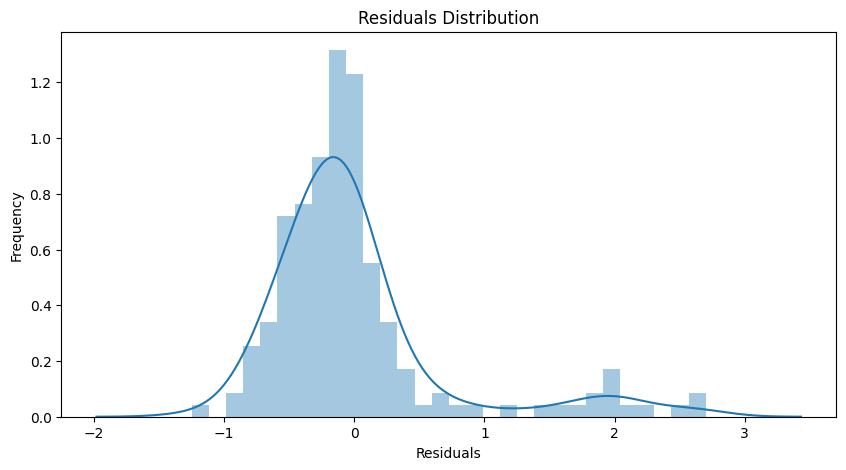

In [14]:
# DATA VISUALIZATION
# Distribution of DOK levels
# This histogram displays the distribution of DOK levels in your dataset.
plt.figure(figsize=(10,5))
sns.distplot(Y, kde=False, bins=30)
plt.title('Distribution of DOK Levels')
plt.xlabel('DOK Level')
plt.ylabel('Frequency')
plt.show()

# Actual vs. Predicted
# This scatter plot shows how well the model's predictions match the actual DOK levels.
plt.figure(figsize=(10,5))
sns.scatterplot(x=y_test, y=predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('Actual vs. Predicted DOK Levels')
plt.xlabel('Actual DOK Level')
plt.ylabel('Predicted DOK Level')
plt.show()

# Residuals (errors) distribution
# Residuals Distribution: This histogram displays the distribution of the residuals (errors) of the model's predictions. Ideally, this should resemble a normal distribution centered around 0.
plt.figure(figsize=(10,5))
sns.distplot((y_test - predictions), bins=30)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()